# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №4 - Метод k-средних, предобработка признаков


###### <hr\>
**Общая информация**

**Срок сдачи:** 25 апреля 2018, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 25 апреля, -4 баллов после 06:00 2 мая, -6 баллов после 06:00 9 мая

При отправлении ДЗ указывайте фамилию в названии файла<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл
<hr\>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

%load_ext pycodestyle_magic

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


# Имплементация K-means

Пользуясь наработками выше, имплементируйте метод k-means.  
При инициализации необходимо задавать количество кластеров, функцию расстояния между кластерами (для оригинального k-means - евклидово расстояние) и начальное состояние генератора случайных чисел.

После обучения, среди атрибутов класса `Kmeans` должны появится
* Метки кластеров для объектов
* Координаты центройдов кластеров

k-means - это алгоритм **кластеризации**, а не классификации, а посему метод `.predict()` в нем фактически не нужен, но он может возвращать метки ближайшего кластера для объектов.

###### Задание 1 (2 баллов)
Имплементируйте метод k-means. Задание считается выполненным, если Ваша реализация работает быстрее реализации из sklearn.

Теория для выполнения задания 2 и 3 остаётся на самостоятельное изучение. Теории немного и она совсем простая.

###### Задание 2 (2 балла)
Имплементируйте класс MiniBatchKMeans, который является классом наследником Kmeans.

###### Задание 3 (2 балла)
Превратите k-means в k-means++. Для этого нужно реализовать метод в классе Kmeans, который будет инициализировать более "хорошие" значения центроидов. Чтобы использовался метод k-means++, в параметр init необходимо передать строковое значение 'k-means' (по умолчанию 'random').

###### Задание 4 (2 балла)
В пункте "Проверка корректности метода" нужно нарисовать графики, которые показывают зависимость времени выполнения алгоритма от количества сэмплов. Графики должны быть  нарисованы для различных комбинаций реализаций алгоритма (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). График достаточно построить на 5-10 точках.

###### Задание 5 (2 балла)
В пункте "Применение K-means на реальных данных" нужно сравнить различные реализации k-means (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). После чего написать вывод, в котором должно быть объяснение того, почему один алгоритм оказался лучше остальных или почему не было выявлено лучшего алгоритма.

In [26]:
#%%pycodestyle
from scipy.spatial.distance import cdist


class MyKmeans:

    def __init__(self, k=2, metric='euclidean', max_iter=1000, random_state=None, init='random', eps=0.001):
        """
        Инициализация метода
        :k - количество кластеров
        :metric - функция расстояния между объектами
        :max_iter - максиальное количество итераций
        :random_state - seed для инициализации генератора случайных чисел
        """

        self.k = k
        self.random_state = random_state
        self.metric = metric
        self.max_iter = max_iter
        self.init = init
        self.centroids = np.empty(1)
        self.eps = eps
        self.labels = np.empty(1)

    def init_centroids(self, X, y=None):
        # k-means
        if self.init == 'random':
            self.centroids = X[np.random.choice(np.shape(X)[0], size=self.k, replace=False)]
            return
        # k-means++
        elif self.init == 'k-means':
            # 1. Выбираем 1-ый центроид случайно
            self.centroids[0] = X[np.random.choice(np.shape(X)[0])]

            for step in range(1, self.k):
                distances_sq = (np.square((X[np.newaxis, :] - self.centroids[:step, np.newaxis]))).sum(axis=2)

                Dsq = np.min(distances_sq, axis=0)
                D_sum_sq = np.sum(Dsq, axis=0)

                probs = Dsq/D_sum_sq

                self.centroids[step] = X[np.random.choice(X.shape[0], size=1, replace=False, p=probs)]
            return
        raise TypeError('Wrong init!')

    def fit(self, X, y=None):
        """
        Процедура обучения k-means
        """
        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)

        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])

        # Массив с центройдами кластеров
        self.centroids = np.empty((self.k, X.shape[1]))

        ## Your Code Here
        # начальные центроиды
        self.init_centroids(X, y)

        for _ in range(self.max_iter):
            prev_centroids = np.copy(self.centroids)
            # обновляем принадлежность к классам
            self.labels = cdist(X, self.centroids).argmin(axis=1)

            # обновляем центроиды
            self.centroids = np.array([X[self.labels == i].mean(axis=0) for i in range(self.k)])

            # если изменения не существенны
            if ((prev_centroids - self.centroids)**2).sum() < self.eps:
                break
        return self

    def predict(self, X, y=None):
        """
        Процедура предсказания кластера
        Возвращает метку ближайшего кластера для каждого объекта
        """
        labels = np.empty(X.shape[0])
        for i in range(np.shape(X)[0]):
            labels[i] = np.argmin(np.linalg.norm(self.centroids - X[i], axis=1))
        return labels


class MiniBatchKMeans(MyKmeans):

    def __init__(self, k=2, metric='euclidean', max_iter=1000, random_state=None, init='random', batch_size=100, eps=0.001):

        MyKmeans.__init__(self, k, metric, max_iter, random_state, init, eps)
        self.batch_size = batch_size

    def fit(self, X, y=None):
        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)

        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])

        # Массив с центройдами кластеров
        self.centroids = np.empty((self.k, X.shape[1]))

        # начальные центроиды
        self.init_centroids(X, y)

        for _ in range(self.max_iter):

            minibatch = X[np.random.choice(np.shape(X)[0], size=self.batch_size, replace=False)]

            central_points = np.argmin((np.square((minibatch - self.centroids[:, np.newaxis]))).sum(axis=2), axis=0)
            v = np.zeros(np.shape(central_points)[0])

            # Смещаем каждый центройд в центр соответствующей группы
            for index in range(minibatch.shape[0]):
                centr_point = central_points[index]  # Get cached center for this x
                v[centr_point] += 1                  # Update per-center counts
                eta = 1. / v[centr_point]            # Get per-center learning rate
                                                     # Take gradient step
                self.centroids[centr_point] = (1 - eta) * self.centroids[centr_point] + eta * minibatch[index]
        return self

### Проверка корректности метода

Перед тем как применять алгоритм на реальных данных, нужно испытать его на простых "игрушечных" данных.

Если алгоритм реализован правильно, то метод должен идеально разбивать на 3 кластера данные ниже. Проверьте это.

ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [28]:
from sklearn.datasets import make_blobs

In [29]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)

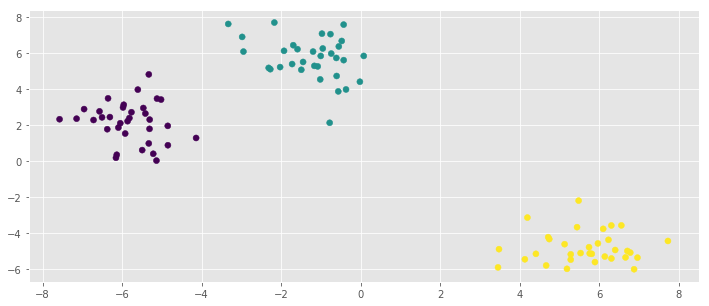

In [30]:
plt.scatter(X[:,0], X[:, 1], c=y)

Проверьте Вашу имплементацию на простых данных (без этого пункта ДЗ не считается выполненным).   
КОММЕНТАРИИ НЕ СТИРАТЬ!

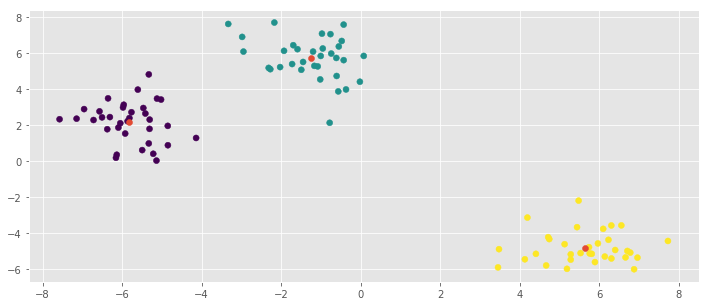

In [33]:
## Работоспособность MyKmeans
kmeans = MyKmeans(k=3)
kmeans.fit(X)
y_test = kmeans.predict(X)

plt.scatter(X[:,0], X[:, 1], c=y_test)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1])

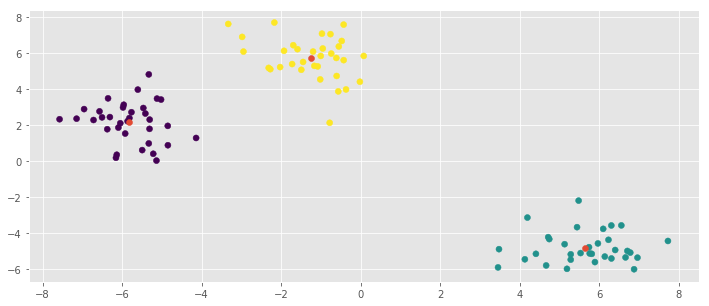

In [34]:
## Работоспособность MyKmeans++
kmeans = MyKmeans(k=3, init='k-means')
kmeans.fit(X)
y_test = kmeans.predict(X)

plt.scatter(X[:,0], X[:, 1], c=y_test)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1])

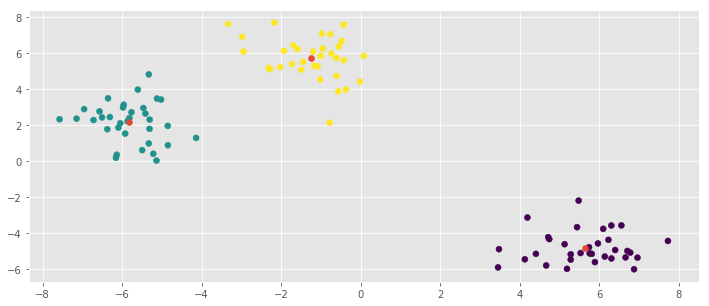

In [35]:
## Работоспособность MyKmeans с MiniBatchMyKmeans
kmeans = MiniBatchKMeans(k=3)
kmeans.fit(X)
y_test = kmeans.predict(X)

plt.scatter(X[:,0], X[:, 1], c=y_test)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1])

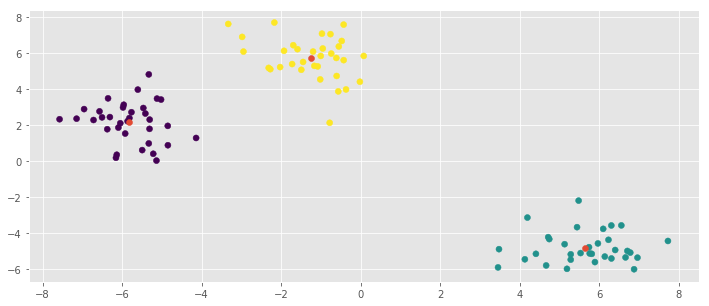

In [36]:
## Работоспособность MyKmeans++ с MiniBatchMyKmeans
kmeans = MiniBatchKMeans(k=3, init='k-means')
kmeans.fit(X)
y_test = kmeans.predict(X)

plt.scatter(X[:,0], X[:, 1], c=y_test)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1])

## Время выполнения алгоритмов

In [40]:
import time 


iterations = 10
n_samples = np.array([100, 500, 1000, 5000, 10000, 50000])
X1, y1 = make_blobs(n_samples=n_samples[-1], n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)

Text(0.5,0,'N, points')

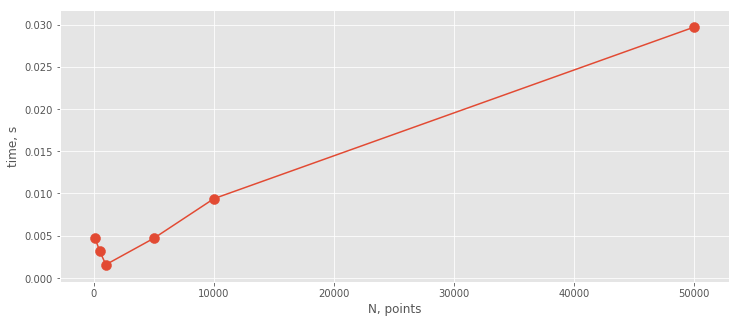

In [43]:
## Время выполнения алгоритма Kmeans из sklearn
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='random', n_init=1, max_iter=1000, tol=0.001, random_state=None)
Time_sklearn = np.empty((iterations, np.shape(n_samples)[0]))

for j in range(np.shape(n_samples)[0]):
    x_test = X1[np.random.choice(n_samples[-1], n_samples[j], replace=False)]
    for i in range(iterations):
        start = time.time()
        kmeans.fit(x_test)
        end = time.time()
        Time_sklearn[i, j] = end - start

Time_sklearn = np.mean(Time_sklearn, axis=0)
plt.plot(n_samples, Time_sklearn)
plt.scatter(n_samples, Time_sklearn, s=100)
plt.ylabel('time, s')
plt.xlabel('N, points')


Text(0.5,0,'N, points')

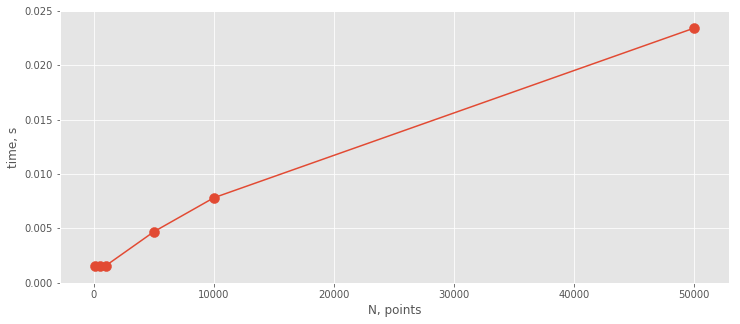

In [44]:
## Время выполнения алгоритма MyKmeans

kmeans = MyKmeans(k=3)
Time_MyKMeans = np.empty((iterations, np.shape(n_samples)[0]))

for j in range(np.shape(n_samples)[0]):
    x_test = X1[np.random.choice(n_samples[-1], n_samples[j], replace=False)]
    for i in range(iterations):
        start = time.time()
        kmeans.fit(x_test)
        end = time.time()
        Time_MyKMeans[i, j] = end - start

Time_MyKMeans = np.mean(Time_MyKMeans, axis=0)
plt.plot(n_samples, Time_MyKMeans)
plt.scatter(n_samples, Time_MyKMeans, s=100)
plt.ylabel('time, s')
plt.xlabel('N, points')


Text(0.5,0,'N, points')

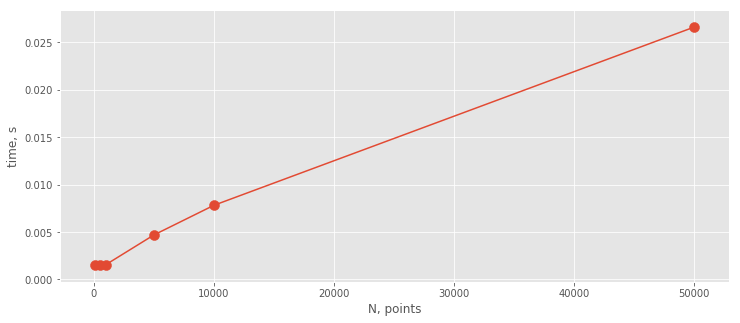

In [45]:
## Время выполнения алгоритма MyKmeans++
kmeans = MyKmeans(k=3, init='k-means')
Time_MyKMeans_kmeans = np.empty((iterations, np.shape(n_samples)[0]))

for j in range(np.shape(n_samples)[0]):
    x_test = X1[np.random.choice(n_samples[-1], n_samples[j], replace=False)]
    for i in range(iterations):
        start = time.time()
        kmeans.fit(x_test)
        end = time.time()
        Time_MyKMeans_kmeans[i, j] = end - start

Time_MyKMeans_kmeans = np.mean(Time_MyKMeans_kmeans, axis=0)
plt.plot(n_samples, Time_MyKMeans_kmeans)
plt.scatter(n_samples, Time_MyKMeans_kmeans, s=100)
plt.ylabel('time, s')
plt.xlabel('N, points')

Text(0.5,0,'N, points')

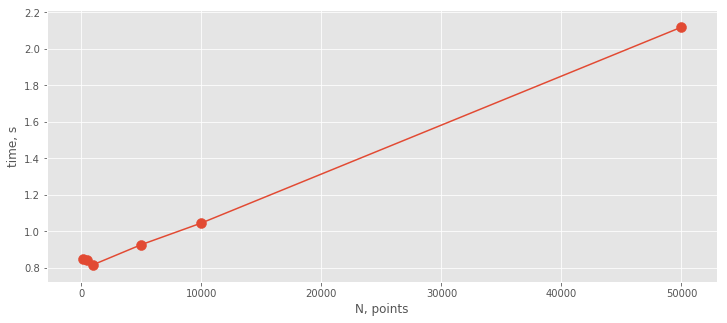

In [46]:
## Время выполнения алгоритма MyKmeans с MiniBatchMyKmeans
kmeans = MiniBatchKMeans(k=3)
Time_MiniBatchKMeans = np.empty((iterations, np.shape(n_samples)[0]))

for j in range(np.shape(n_samples)[0]):
    x_test = X1[np.random.choice(n_samples[-1], n_samples[j], replace=False)]
    for i in range(iterations):
        start = time.time()
        kmeans.fit(x_test)
        end = time.time()
        Time_MiniBatchKMeans[i, j] = end - start

Time_MiniBatchKMeans = np.mean(Time_MiniBatchKMeans, axis=0)
plt.plot(n_samples, Time_MiniBatchKMeans)
plt.scatter(n_samples, Time_MiniBatchKMeans, s=100)
plt.ylabel('time, s')
plt.xlabel('N, points')

Text(0.5,0,'N, points')

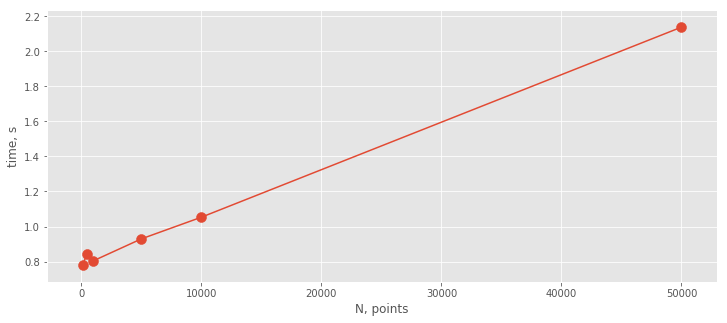

In [47]:
## Время выполнения алгоритма  MyKmeans++ с MiniBatchMyKmeans
kmeans = MiniBatchKMeans(k=3, init='k-means')
Time_MiniBatchKMeans_kmeans = np.empty((iterations, np.shape(n_samples)[0]))

for j in range(np.shape(n_samples)[0]):
    x_test = X1[np.random.choice(n_samples[-1], n_samples[j], replace=False)]
    for i in range(iterations):
        start = time.time()
        kmeans.fit(x_test)
        end = time.time()
        Time_MiniBatchKMeans_kmeans[i, j] = end - start

Time_MiniBatchKMeans_kmeans = np.mean(Time_MiniBatchKMeans_kmeans, axis=0)
plt.plot(n_samples, Time_MiniBatchKMeans_kmeans)
plt.scatter(n_samples, Time_MiniBatchKMeans_kmeans, s=100)
plt.ylabel('time, s')
plt.xlabel('N, points')

# Применение K-means на реальных данных

Загрузите [данные](https://github.com/brenden17/sklearnlab/blob/master/facebook/snsdata.csv) в которых содержится описание интересов профилей учеников старшей школы США.  (без этого пункта задание не считается выполненным).   
ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [57]:
df_sns = pd.read_csv('snsdata.csv', sep=',')
df_sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


Данные устроены так: 
* Год выпуска
* Пол
* Возраст
* Количество друзей
* 36 ключевых слов, которые встречаются в профилe facebook (интересы, сообщества, встречи)

* Удалите все признаки кроме 36 ключевых слов.
* Нормализуйте данные - из каждого столбца вычтите его среднее значение и поделите на стандартное отклонение.
* Используйте метод k-means чтобы выделить 9 кластеров
* Попробуйте проинтерпретировать каждый кластер проанализировав полученные центройды (Некоторые кластеры могут быть очень большие и очень маленькие - плохо интерпретируются)   
КОММЕНТАРИИ НЕ СТИРАТЬ!

In [58]:
df_sns = df_sns.drop(['gradyear', 'gender', 'age', 'friends'], 1)
keywords = np.array(df_sns.columns)

X = df_sns.iloc[:, :].values
X = X - X.mean(axis=0)
X = X / X.std(axis=0)

df_sns.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [62]:
## MyKMeans
kmeans = MyKmeans(k=9)

kmeans.fit(X)
centroids_kmeans = kmeans.centroids
for c in centroids_kmeans:
    top_words = np.argsort(c)[-4:]
    print (keywords[top_words])

['sports' 'basketball' 'volleyball' 'softball']
['rock' 'music' 'band' 'marching']
['soccer' 'church' 'sports' 'tennis']
['church' 'god' 'jesus' 'bible']
['mall' 'shopping' 'abercrombie' 'hollister']
['sports' 'basketball' 'baseball' 'football']
['death' 'bible' 'jesus' 'blonde']
['mall' 'dance' 'cute' 'shopping']
['sex' 'hair' 'drugs' 'kissed']


In [51]:
## MyKMeans++
kmeans = MyKmeans(k=9, init='k-means')

kmeans.fit(X)
centroids_kmeans_plus = kmeans.centroids
for c in centroids_kmeans_plus:
    top_words = np.argsort(c)[-4:]
    print (keywords[top_words])

['rock' 'music' 'band' 'marching']
['soccer' 'jesus' 'tennis' 'blonde']
['mall' 'shopping' 'abercrombie' 'hollister']
['mall' 'dance' 'cute' 'shopping']
['rock' 'hair' 'sex' 'kissed']
['football' 'softball' 'baseball' 'basketball']
['death' 'drunk' 'sex' 'blonde']
['church' 'god' 'jesus' 'bible']
['hair' 'kissed' 'drunk' 'drugs']


In [52]:
## MyKMeans с MiniBatchMyKMeans
kmeans = MiniBatchKMeans(k=9, batch_size=1000)

kmeans.fit(X)
centroids_minibatch = kmeans.centroids
for c in centroids_minibatch:
    top_words = np.argsort(c)[-4:]
    print (keywords[top_words])

['rock' 'death' 'church' 'sex']
['hair' 'sex' 'drunk' 'kissed']
['hair' 'mall' 'hollister' 'abercrombie']
['cute' 'hair' 'rock' 'music']
['drugs' 'sex' 'hair' 'kissed']
['death' 'drunk' 'sex' 'blonde']
['death' 'god' 'jesus' 'bible']
['band' 'softball' 'baseball' 'volleyball']
['kissed' 'sex' 'hair' 'hollister']


In [53]:
## MyKMeans++ с MiniBatchMyKMeans
kmeans = MiniBatchKMeans(k=9, init='k-means', batch_size=1000)

kmeans.fit(X)
centroids_minibatch_kmeans = kmeans.centroids
for c in centroids_minibatch_kmeans:
    top_words = np.argsort(c)[-4:]
    print (keywords[top_words])

['blonde' 'music' 'hair' 'god']
['sports' 'music' 'band' 'marching']
['kissed' 'cute' 'hair' 'clothes']
['cute' 'hair' 'rock' 'music']
['bible' 'soccer' 'softball' 'church']
['death' 'god' 'jesus' 'bible']
['hair' 'sex' 'drunk' 'kissed']
['death' 'drunk' 'sex' 'blonde']
['soccer' 'football' 'sports' 'swimming']


## Результаты

Скорее всего некоторые кластеры очень маленькие и их сложно найти, особенно алгоритмами MiniBatchKMeans. Нужно брать маленький eps - критерий прикращения счета, что делает расчет очень долгим. Алгоритм KMeans показал лучшие результаты. Поэтому рассмотрим центроиды, полученные с помощью алгоритма KMeans.

In [60]:
# названия колонок
keywords1 = list(keywords)
keywords1

['basketball',
 'football',
 'soccer',
 'softball',
 'volleyball',
 'swimming',
 'cheerleading',
 'baseball',
 'tennis',
 'sports',
 'cute',
 'sex',
 'sexy',
 'hot',
 'kissed',
 'dance',
 'band',
 'marching',
 'music',
 'rock',
 'god',
 'church',
 'jesus',
 'bible',
 'hair',
 'dress',
 'blonde',
 'mall',
 'shopping',
 'clothes',
 'hollister',
 'abercrombie',
 'die',
 'death',
 'drunk',
 'drugs']

Centroid #1


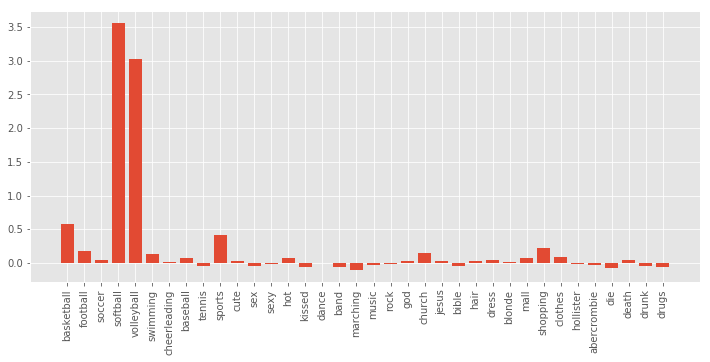

Centroid #2


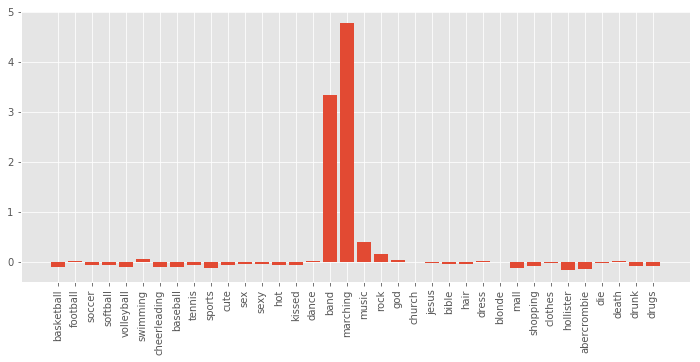

Centroid #3


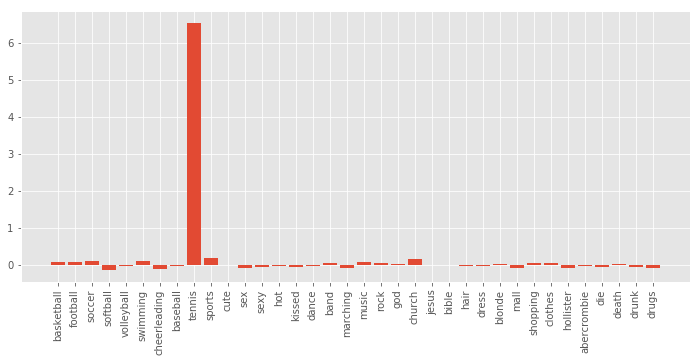

Centroid #4


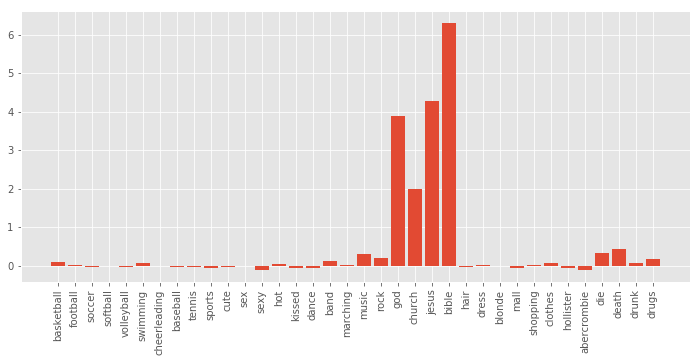

Centroid #5


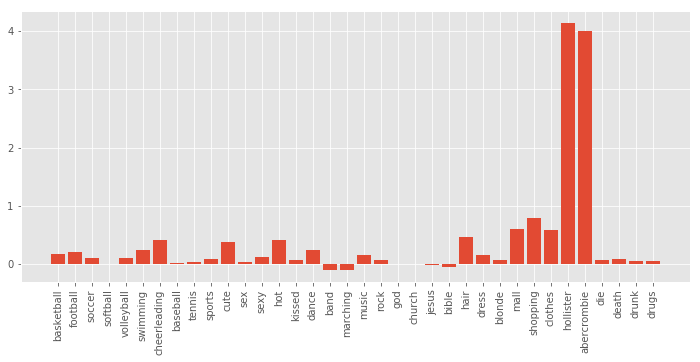

Centroid #6


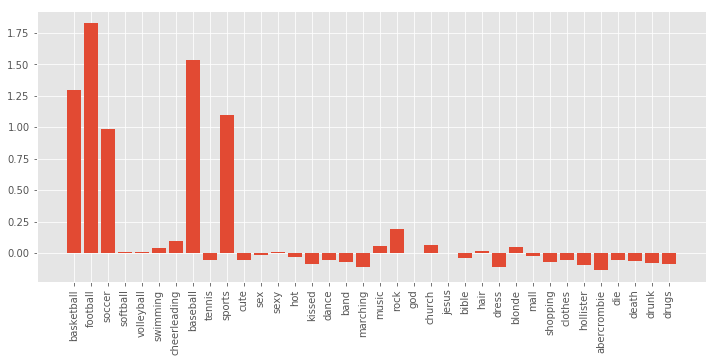

Centroid #7


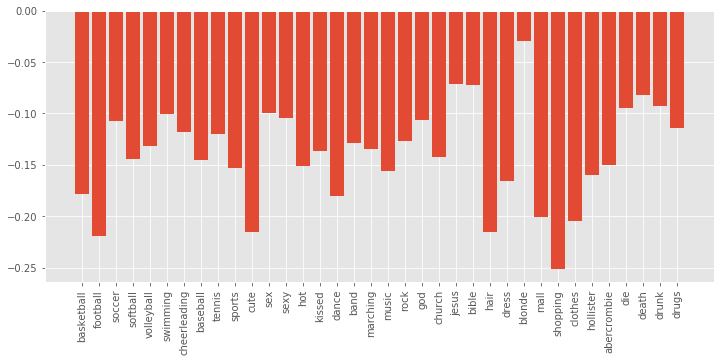

Centroid #8


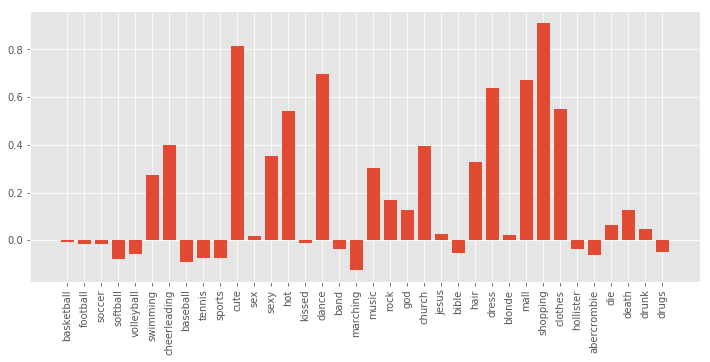

Centroid #9


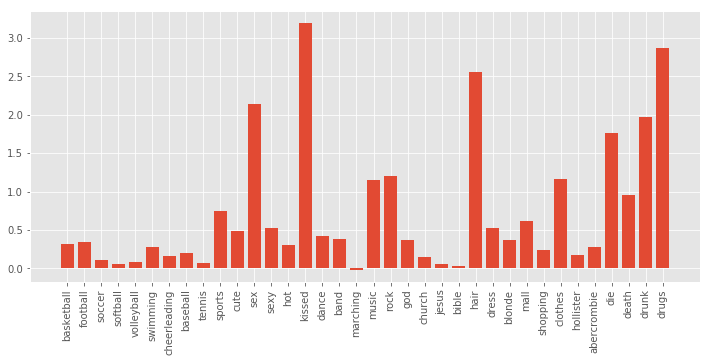

In [63]:
for i in range(9):
    print("Centroid #" + str(i + 1))
    plt.bar(range(36), centroids_kmeans[i])
    plt.xticks(range(36), keywords1, rotation=90)
    plt.show()

## Выводы

В задании реализованы и проанализированы алгоритмы кластеризации данных. Рассмотрено семейство алгоритмов KMeans. Алгоритм KMeans показал наилучшие результаты, но в при некоторых начальных условиях он может сходиться неправильно. Данная проблема исправлена в KMeans++. Алгоритм MiniBatchKMeans с KMeans требует меньше времени, но менее стабилен при большом количестве кластеров или при наличии маленьких кластеров. Алгоритм MiniBatchKMeans c KMeans++ работает стабильнее.

Алгоритмы кластеризации позволили выделить кластеры учеников с одинаковыми интересами. Центроиды кластеров показыны выше в разделе "результаты". Как уже отмечалось алгоритм KMeans показал наилучшие результаты.